# Rain heatmap over time

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import scipy
from functools import partial
import seaborn as sns
import calendar
from DL_Data import DL_Data

## Importation of data

In [5]:
# Paramètres des données
Station = ['Aigle','Dole','Payerne','Fretaz','Pully','Nyon']
num_sta = 5

Path = "../Database/Precipitations"
df = DL_Data(Path, Station[num_sta])

print('\nDonnées sélectionnées: \n\n\tStation: '+Station[num_sta])
df = df.reset_index(drop=True)

value_column = df.columns[1]
df[value_column] = pd.to_numeric(df[value_column], errors='coerce')

# Gestion des moyennes et maximas par an
n = 1

rows_to_keep = len(df) - (len(df) % n)
df = df.iloc[:rows_to_keep]
df['group'] = np.floor(df.index / n)
df['averaged'] = df.groupby('group')[value_column].mean()*6
df['year'] = df['time'].dt.year
pdmaximas = df.groupby('year')['averaged'].max()


Données sélectionnées: 

	Station: Nyon


## Standarization and classification per year

In [6]:
years = np.array(sorted(df['year'].unique()))
rain_per_year = [df.loc[df['year'] == y, value_column].values for y in years]
maxlenyear = max(len(r) for r in rain_per_year)
rain_matrix = np.zeros(shape=[len(years), maxlenyear])
rain_matrix_2 = np.zeros(shape=[len(years), maxlenyear])
rain_matrix_convolved = np.zeros(shape=[len(years), maxlenyear])
rain_matrix_convolved_2 = np.zeros(shape=[len(years), maxlenyear])


m = 6*24*30*3
m2 = 6*24*30
std = np.std(df[value_column])
mean = np.mean(df[value_column])

for i, r in enumerate(rain_per_year):
    rain_matrix[i, :len(r)] = (r-mean)/std
    rain_matrix_2[i, :len(r)] = r
    rain_matrix_convolved[i] = np.convolve(rain_matrix[i], np.ones(m)/m, mode='same')
    rain_matrix_convolved_2[i] = np.convolve(rain_matrix_2[i], np.ones(m2), mode='same')

## Heatmap

### Standarized rains with convolution

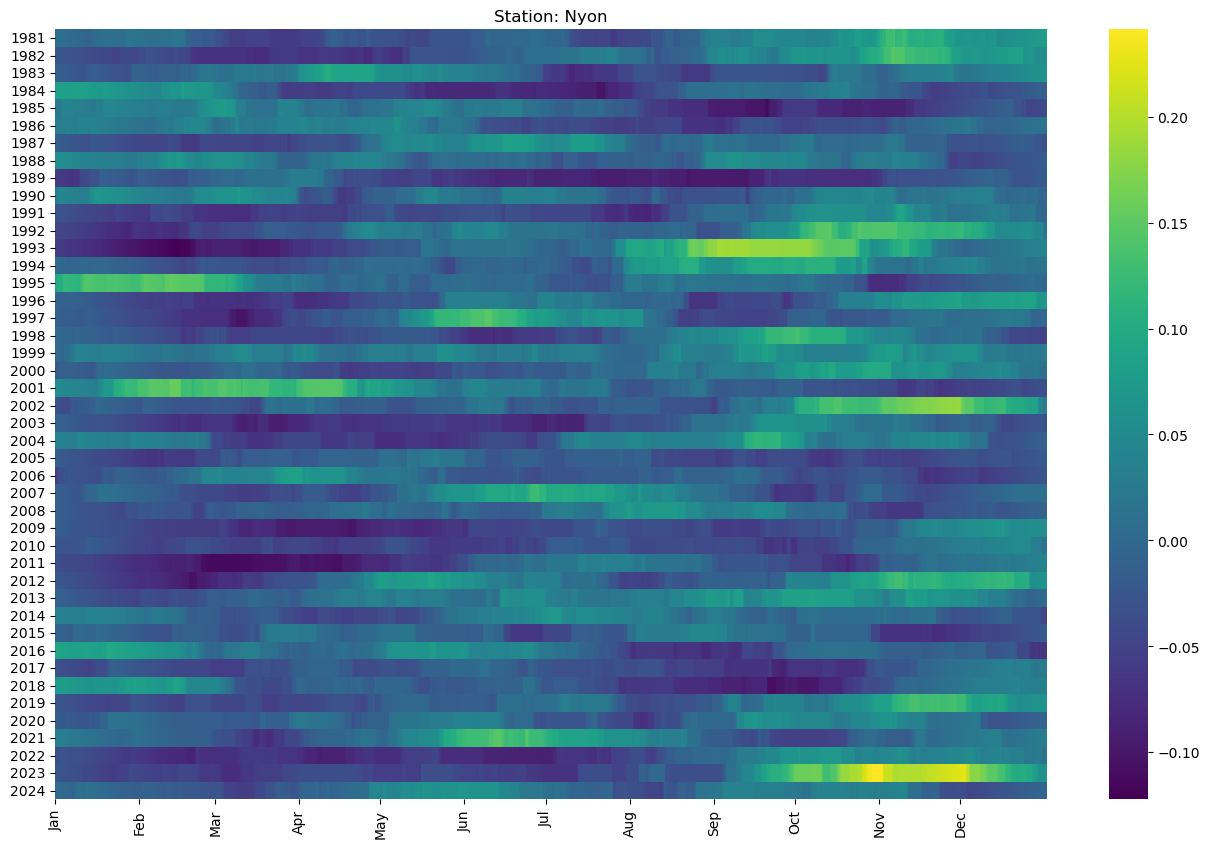

In [8]:
month_starts = np.cumsum([0] + [6*24*calendar.monthrange(1981, m)[1] for m in range(1, 12)])
month_labels = [calendar.month_abbr[m] for m in range(1, 13)]
plt.figure(figsize=(16,10))
ax = sns.heatmap(rain_matrix_convolved, yticklabels=1981+np.arange(0,len(years)),cmap='viridis')
ax.set_xticks(month_starts)
ax.set_xticklabels(month_labels)
plt.title('Station: '+Station[num_sta])
plt.show()


### Rain with convolution, no standarization

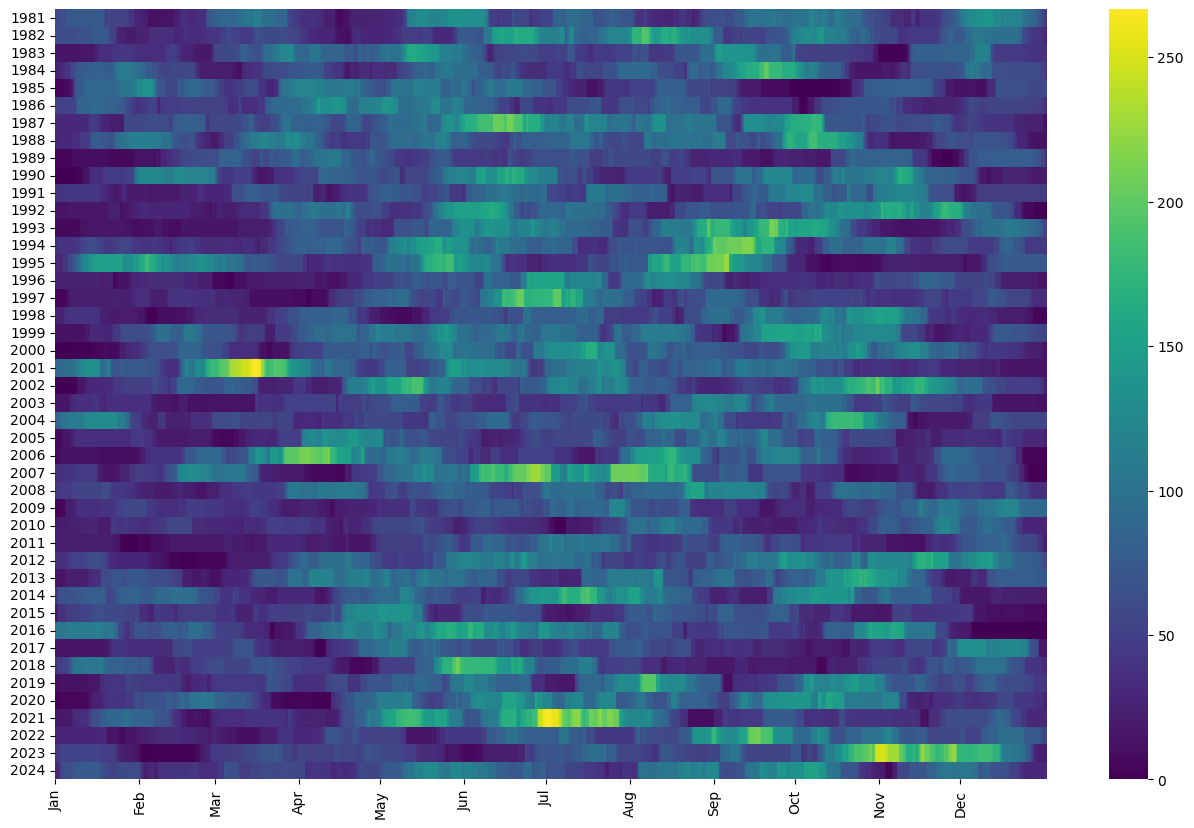

In [18]:
month_starts = np.cumsum([0] + [6*24*calendar.monthrange(1981, m)[1] for m in range(1, 12)])
month_labels = [calendar.month_abbr[m] for m in range(1, 13)]
plt.figure(figsize=(16,10))
ax = sns.heatmap(rain_matrix_convolved_2, yticklabels=1981+np.arange(0,len(years)),cmap='viridis')
ax.set_xticks(month_starts)
ax.set_xticklabels(month_labels)
plt.show()

### Cumul of Rains per month, no standarization nor convolution

In [38]:
month_precipitation = np.zeros(shape=[len(years),12])

for i, y in enumerate(years):
    months_duration = [calendar.monthrange(1981, m)[1] for m in range(1, 13)]
    count = 0
    for j, m in enumerate(months_duration):
        m_in_minutes = m*6*24
        month_precipitation[i, j] = np.sum(rain_matrix_2[i, count:count+m_in_minutes], axis=0)
        count += m_in_minutes

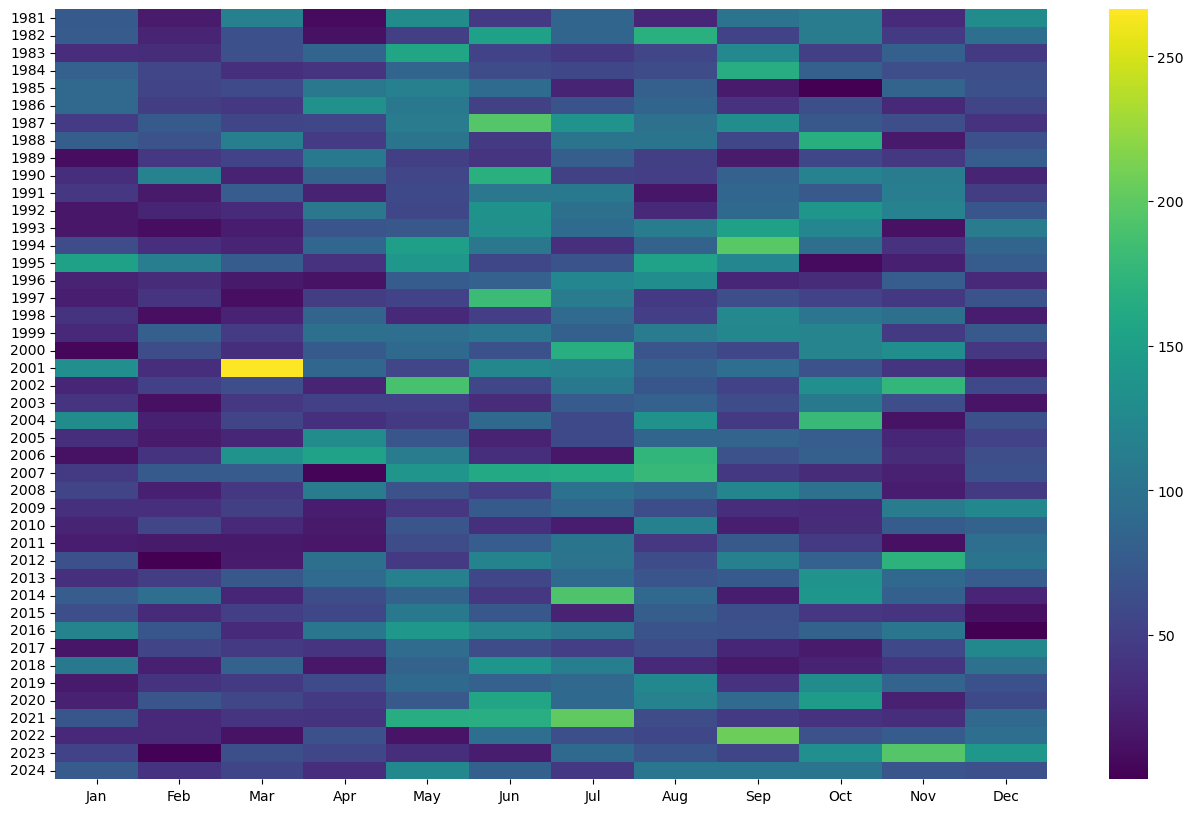

In [40]:
plt.figure(figsize=(16,10))
ax = sns.heatmap(month_precipitation, cmap='viridis', yticklabels=1981+np.arange(0,len(years)))
ax.set_xticks(np.arange(12)+0.5)
ax.set_xticklabels(month_labels)
plt.show()